# Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов

### Тариф «Смарт»

   1. Ежемесячная плата: 550 рублей
   2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
   3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

### Тариф «Ультра»

   1. Ежемесячная плата: 1950 рублей
   2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
   3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

# Описание данных

#### Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

#### Таблица calls (информация о звонках):

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

#### Таблица messages (информация о сообщениях):

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

#### Таблица internet (информация об интернет-сессиях):

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

#### Таблица tariffs (информация о тарифах):

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Шаг 1. Откроем файлы с данными и изучим общую информацию

In [ ]:
import pandas as pd
import seaborn as sns
from pymystem3 import Mystem
m = Mystem()

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats as st
from IPython.display import display

In [ ]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

In [ ]:
df_calls.info()
df_calls.tail(20)
#df_calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
202587,1499_200,2018-10-04,7.89,1499
202588,1499_201,2018-12-15,18.90,1499
202589,1499_202,2018-10-03,8.92,1499
202590,1499_203,2018-12-03,0.00,1499
202591,1499_204,2018-12-12,1.60,1499
202592,1499_205,2018-10-13,0.00,1499
202593,1499_206,2018-12-26,0.00,1499
202594,1499_207,2018-10-28,0.00,1499
202595,1499_208,2018-11-03,14.29,1499
202596,1499_209,2018-12-16,0.00,1499


In [ ]:
df_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [ ]:
df_internet.info()
df_internet.tail(10)
#df_internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
149386,149386,1499_147,0.00,2018-10-21,1499
149387,149387,1499_148,268.19,2018-11-13,1499
149388,149388,1499_149,778.68,2018-11-24,1499
149389,149389,1499_150,273.98,2018-11-20,1499
149390,149390,1499_151,752.72,2018-10-11,1499
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


In [ ]:
df_internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [ ]:
df_messages.info()
df_messages.tail(10)
#df_messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
123026,1499_174,2018-12-14,1499
123027,1499_175,2018-10-09,1499
123028,1499_176,2018-12-17,1499
123029,1499_177,2018-12-30,1499
123030,1499_178,2018-10-25,1499
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


In [ ]:
df_messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [ ]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [ ]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
df_users.info()
df_users.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
490,1490,30,NaN,Москва,Радомир,Алесин,2018-04-03,smart
491,1491,56,NaN,Челябинск,Радислав,Андрейкин,2018-04-25,ultra
492,1492,63,NaN,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart
493,1493,71,NaN,Красноярск,Таисия,Ахматулина,2018-11-24,ultra
494,1494,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [ ]:
df_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

## Вывод
   1. В таблице df_calls заменим тип данных call_date на datetime64. Округлим duration в бОльшую сторону, изменим тип данных на int. Значения 0 и 38 мин. вполне реальны, оставим.
   2. В таблице df_internet в столбце session_date заменим тип данных на datetime64. Округлим к бОльшему значению, изменим тип данных на int.
   3. В таблице df_messages заменим тип данных в столбце message_date на datetime64.
   4. Таблицу df_tariffs оставляем.
   5. В таблице df_users изменим тип данных в столбцах churn_date и reg_date на datetime64. Отсутствующие значения означают, что тариф действовал на момент выгрузки.

### Шаг 2. Подготовим данные

#### Округлим значения в столбцах и поменяем тип данных

In [ ]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype(int)
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [ ]:
df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil).astype(int)
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  int64         
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


In [ ]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [ ]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    object        
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


#### Посчитаем для каждого пользователя

###### Количество сделанных звонков и израсходованных минут разговора по месяцам
###### Количество отправленных сообщений по месяцам
###### Объем израсходованного интернет-трафика по месяцам

Добавим к таблицам df_calls, df_internet и df_messages столбец со значениями по месяцам и сгруппируем по user_id и month

In [ ]:
df_calls['month'] = df_calls['call_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month

In [ ]:
df_calls_groupby = df_calls.groupby(['user_id', 'month'])['duration'].agg(['count','sum']).reset_index()
df_calls_groupby.columns = ['user_id', 'month', 'call_count', 'call_duration']
#df_calls_groupby.head(15)

In [ ]:
df_internet_groupby = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
df_internet_groupby.columns = ['user_id', 'month', 'sum_mb_used']
#df_internet_groupby.head(15)

In [ ]:
df_messages_groupby = df_messages.groupby(['user_id', 'month'])['id'].count().reset_index()
df_messages_groupby.columns = ['user_id', 'month', 'messages_count']
#df_messages_groupby.head(15)

In [ ]:
df_users_loc = df_users.loc[:,['user_id', 'city', 'tariff']]
statistic_data = pd.merge(df_calls_groupby, df_messages_groupby, how='outer', on=['user_id', 'month'])
statistic_data = pd.merge(statistic_data, df_internet_groupby, how='outer', on=['user_id', 'month'])
statistic_data = pd.merge(statistic_data, df_users_loc, how='outer', on=['user_id'])
#statistic_data.head(15)

Заменим пропущенные значения на 0

In [ ]:
statistic_data = statistic_data.fillna(0)
statistic_data.head(15)

,user_id,month,call_count,call_duration,messages_count,sum_mb_used,city,tariff
0,1000,5.0,22.0,159.0,22.0,2256.0,Краснодар,ultra
1,1000,6.0,43.0,172.0,60.0,23257.0,Краснодар,ultra
2,1000,7.0,47.0,340.0,75.0,14016.0,Краснодар,ultra
3,1000,8.0,52.0,408.0,81.0,14070.0,Краснодар,ultra
4,1000,9.0,58.0,466.0,57.0,14581.0,Краснодар,ultra
5,1000,10.0,57.0,350.0,73.0,14717.0,Краснодар,ultra
6,1000,11.0,43.0,338.0,58.0,14768.0,Краснодар,ultra
7,1000,12.0,46.0,333.0,70.0,9827.0,Краснодар,ultra
8,1001,11.0,59.0,430.0,0.0,18452.0,Москва,smart
9,1001,12.0,63.0,414.0,0.0,14053.0,Москва,smart


In [ ]:
statistic_data.isna().sum()

user_id           0
month             0
call_count        0
call_duration     0
messages_count    0
sum_mb_used       0
city              0
tariff            0
dtype: int64

In [ ]:
statistic_data.shape

(3216, 8)

In [ ]:
statistic_data.user_id.nunique()

500

###### Помесячная выручка с каждого пользователя

In [ ]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
#введем функцию подсчета помесячной выручки с каждого пользователя
def det_revenue(row):
    messages = row['messages_count']
    mb_used = row['sum_mb_used']
    tariff = row['tariff']
    duration = row['call_duration']
    
    if tariff == 'smart':
        above_duration = duration - df_tariffs.loc[0, 'minutes_included']
        above_mb = mb_used - df_tariffs.loc[0, 'mb_per_month_included']
        above_messages = messages - df_tariffs.loc[0, 'messages_included']
        
        if above_duration < 0: above_duration = 0
        if above_mb < 0: above_mb = 0
        if above_messages < 0: above_messages = 0
        
        return (df_tariffs.loc[0, 'rub_per_message'] * above_messages + 
                   (df_tariffs.loc[0, 'rub_per_gb'] / 1024) * above_mb + 
                   df_tariffs.loc[0, 'rub_per_minute'] * above_duration + 
                   df_tariffs.loc[0, 'rub_monthly_fee']
                  ) 
    else:
        above_duration = duration - df_tariffs.loc[1, 'minutes_included']
        above_mb = mb_used - df_tariffs.loc[1, 'mb_per_month_included']
        above_messages = messages - df_tariffs.loc[1, 'messages_included']
        
        if above_duration < 0: above_duration = 0
        if above_mb < 0: above_mb = 0
        if above_messages < 0: above_messages = 0
        
        return (df_tariffs.loc[1, 'rub_per_message'] * above_messages + 
                   (df_tariffs.loc[1, 'rub_per_gb'] / 1024) * above_mb + 
                   df_tariffs.loc[1, 'rub_per_minute'] * above_duration + 
                   df_tariffs.loc[1, 'rub_monthly_fee']
                  )

statistic_data['month_income'] = statistic_data.apply(det_revenue, axis=1)
statistic_data.head(10)

,user_id,month,call_count,call_duration,messages_count,sum_mb_used,city,tariff,month_income
0,1000,5.0,22.0,159.0,22.0,2256.0,Краснодар,ultra,1950.00000
1,1000,6.0,43.0,172.0,60.0,23257.0,Краснодар,ultra,1950.00000
2,1000,7.0,47.0,340.0,75.0,14016.0,Краснодар,ultra,1950.00000
3,1000,8.0,52.0,408.0,81.0,14070.0,Краснодар,ultra,1950.00000
4,1000,9.0,58.0,466.0,57.0,14581.0,Краснодар,ultra,1950.00000
5,1000,10.0,57.0,350.0,73.0,14717.0,Краснодар,ultra,1950.00000
6,1000,11.0,43.0,338.0,58.0,14768.0,Краснодар,ultra,1950.00000
7,1000,12.0,46.0,333.0,70.0,9827.0,Краснодар,ultra,1950.00000
8,1001,11.0,59.0,430.0,0.0,18452.0,Москва,smart,1153.90625
9,1001,12.0,63.0,414.0,0.0,14053.0,Москва,smart,550.00000


In [ ]:
statistic_data['month_income'].describe()

count    3216.000000
mean     1486.709572
std       783.935879
min       550.000000
25%       694.000000
50%      1563.175781
75%      1950.000000
max      6711.015625
Name: month_income, dtype: float64

### Вывод
    Создали новую таблицу statistic_data - в которую сгруппировали данные по каждому абоненту за каждый месяц пользования.        
    Заполнили пропущенные значения.  
    Добавили в таблицу столбец с выручкой по месяцам.

### Шаг 3. Проанализируем данные

###### Опишм поведение клиентов оператора, исходя из выборки.
    Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
    Посчитаем среднее количество, дисперсию и стандартное отклонение. 
    Построим гистограммы. 
    Опишим распределения.

In [ ]:
statistic_data.pivot_table(index='tariff', values=['call_duration', 'messages_count', 'sum_mb_used', 'month_income'],
                          aggfunc=['median', 'mean', 'var', 'std'])

median                                                  mean  \
       call_duration messages_count month_income sum_mb_used call_duration   
tariff                                                                       
smart          421.5           28.0   959.546875     16529.0    417.747534   
ultra          518.0           38.0  1950.000000     19320.0    526.089249   

                                                            var  \
       messages_count month_income   sum_mb_used  call_duration   
tariff                                                            
smart       33.369058  1233.043032  16221.910762   36281.393836   
ultra       49.313387  2060.417872  19467.137931  101052.493549   

                                                             std  \
       messages_count   month_income   sum_mb_used call_duration   
tariff                                                             
smart      796.955256  620383.654857  3.464852e+07    190.476754   
ultra     2285.417425  126836.789215  1.022173e+08    317.887549   

                                                  
       messages_count month_income   sum_mb_used  
tariff                                            
smart       28.230396   787.644371   5886.299627  
ultra       47.806040   356.141530  10110.255401

In [ ]:
statistic_data.pivot_table(index='tariff', values=['call_duration', 'messages_count', 'sum_mb_used', 'month_income'],
                          aggfunc=['median', 'mean', 'var', 'std']).T.round()

tariff                      smart        ultra
median call_duration        422.0        518.0
       messages_count        28.0         38.0
       month_income         960.0       1950.0
       sum_mb_used        16529.0      19320.0
mean   call_duration        418.0        526.0
       messages_count        33.0         49.0
       month_income        1233.0       2060.0
       sum_mb_used        16222.0      19467.0
var    call_duration      36281.0     101052.0
       messages_count       797.0       2285.0
       month_income      620384.0     126837.0
       sum_mb_used     34648523.0  102217264.0
std    call_duration        190.0        318.0
       messages_count        28.0         48.0
       month_income         788.0        356.0
       sum_mb_used         5886.0      10110.0

    Пользователи тарифа смарт в среднем тратят интернет трафика больше лимита и переплачивают почти в два раза по тарифу.
    Ползователи тарифа ультра укладываются в лимиты тарифа.

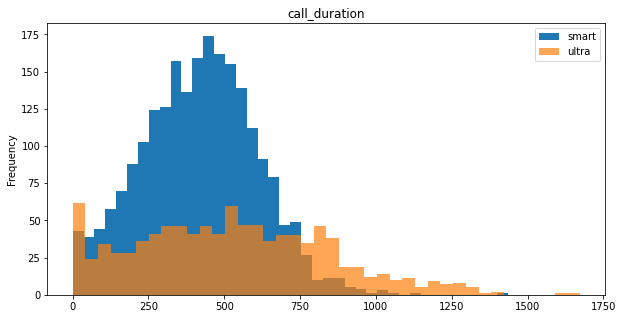

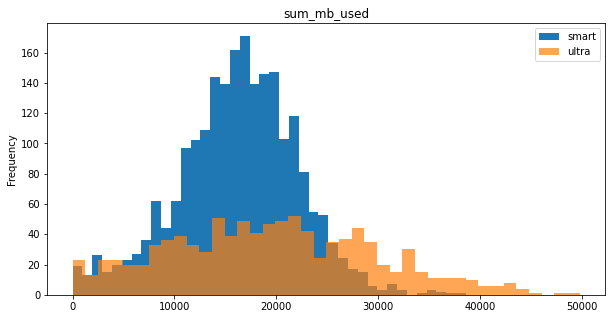

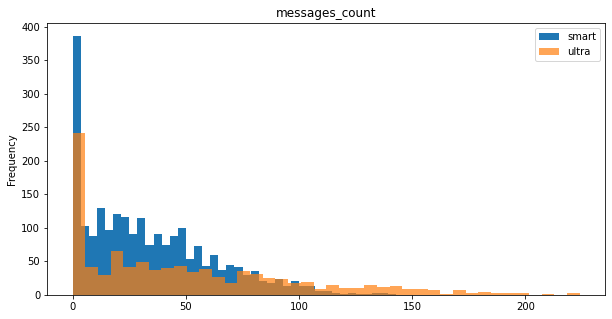

In [ ]:
list_of_columns=['call_duration','sum_mb_used', 'messages_count']
df_tariffs = ['ultra','smart']
for column in list_of_columns:
        statistic_data.loc[statistic_data.loc[:,'tariff'] == 'smart'][column].plot(kind = 'hist',
                                                                            bins = 40,
                                                                            label = 'smart', figsize = (10,5), 
                                                                           )
        statistic_data.loc[statistic_data.loc[:,'tariff'] == "ultra"][column].plot(kind = 'hist',
                                                                            bins = 40,
                                                                            alpha =0.7,
                                                                            label = 'ultra', figsize = (10,5), 
                                                                           )
        plt.title(column)
        plt.legend()
        plt.show()

#### Вывод
    Распределения продолжительности звонков и использованного трафика для обоих тарифов близки к нормальному распределению и относительно симметричны.

    Гистограмма распределения отправленных сообщений имеет ярко выраженный скос вправо. 

### Шаг 4. Проверим гипотезы

   1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
   2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

##### Гипотезы
###### H<sub>0</sub> - средняя выручка пользователей тарифов «Смарт» и «Ультра» равны
###### H<sub>1</sub> - средняя выручка пользователей тарифов «Смарт» и «Ультра» различается

Создадим два датасета, пользователи Смарт и Ультра.

In [ ]:
smart = statistic_data.query('tariff == "smart"')['month_income']
ultra = statistic_data.query('tariff == "ultra"')['month_income']
alpha = .05

results = st.ttest_ind(ultra, smart, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.6656394049422593e-296
Отвергаем нулевую гипотезу


In [ ]:
statistic_data.pivot_table(index='tariff', values='month_income', aggfunc='mean')

,month_income
tariff,
smart,1233.043032
ultra,2060.417872


    Мы отвергаем нулевую гипотезу, что средние выручки пользователей тарифов равны.
    Cредняя выручка отличается почти в два раза.

##### Гипотезы
###### H<sub>0</sub> - средняя выручка пользователей из Москвы равна средней выручки пользователей из других регионов.
###### H<sub>1</sub> - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [ ]:
moscow = statistic_data.query('city == "Москва"')['month_income']
others = statistic_data.query('city != "Москва"')['month_income']

In [ ]:
results = st.ttest_ind(moscow, others, equal_var=False) 
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4517561756356935
Не получилось отвергнуть нулевую гипотезу


In [ ]:
statistic_data.query("city == 'Москва'")['month_income'].mean()

1507.276761968085

In [ ]:
statistic_data.query("city != 'Москва'")['month_income'].mean()

1481.8855588711613

     Значения средних отличаются незначительно, что подтверждается нулевой гипотезой

### Шаг 5. Общий вывод

    Ознакомились с общей информацией по датасетам.
    Выяснили, что в некоторых столбцах датасетов необходимо изменить тип данных, округлить значения.
    Посчитали для каждого пользователя:
    - Количество сделанных звонков и израсходованных минут разговора по месяцам
    - Количество отправленных сообщений по месяцам
    - Объем израсходованного интернет-трафика по месяцам
    Заполнили пропущенные значения 0, т.к. абонент может не пользоваться интернетом или не отправлять СМС-сообщения.
    Посчитали выручку с каждого пользователя.
    Создали новую таблицу statistic_data - в которую сгруппировали данные по каждому абоненту за каждый месяц пользования.         Добавили в таблицу столбец с выручкой по месяцам.
    Проанализировали данные. Увидели, что пользователи тарифа Smart в среднем тратят интернет трафика больше лимита и платят в среднем на 400 р. больше стоимости тарифа. Ползователи тарифа Ultra укладываются в лимиты тарифа.
    Мы проверили гипотезы:
    - что средняя выручка от пользователей тарифа Smart и Ultra равны.
    - что средняя выручка пользователей из Москвы равна средней выручки пользователей из других регионов.
    В качестве альтернативных гипотез мы предположили, что средние выручки не будут равны. Для оценки мы использовали уровень значимости критерия Стьюдента для независимых выборок. В данном случае мы используем именно его, т.к. средние выручки выборок не зависят друг от друга.
    В случае с тарифами мы отвергли нулевую гипотезу, и можем утверждать, что средняя выручка пользователя тарифа Smart и тарифа Ultra отличаются.
    В случае с городами мы не смогли отвергнуть нулевую гипотезу и сделали вывод о том, что с вероятностью 55%, сравнивая средние выручки, мы бы получали схожие значения.